
# Previous Instructions

For this activity, you will need to install to libraries: Keras and TensorFlow (CPU-only). 
More instructions are available at: https://keras.io/#installation and https://www.tensorflow.org/install/.

# Sentiment Analysis of Movie Reviews:  a binary classification example

Example obtained from the book "Deep Learning with Python; CHOLLET, François"

Two-class classification, or binary classification, may be the most widely applied kind
of machine-learning problem. In this example, you’ll learn to classify movie reviews as
positive or negative, based on the text content of the reviews.

### The IMDB Dataset

You’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
reviews for testing, each set consisting of 50% negative and 50% positive reviews.

#### Loading dataset

In [1]:
from keras.datasets import imdb
# The argument num_words=10000 means you’ll only keep the top 10,000 most frequently 
# occurring words in the training data. Rare words will be discarded. The variables 
# train_data and test_data are lists of reviews; each review is a list of word indices 
# (encoding a sequence of words). train_labels and test_labels are lists of 0s and 1s,
# where 0 stands for negative and 1 stands for positive:
num_words=10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
#For kicks, here’s how you can quickly decode one of these reviews back to English words:
word_index = imdb.get_word_index()

In [3]:
# Reverses it, mapping integer indices to words 
reverse_word_index = dict( [(value, key) for (key, value) in word_index.items()])
# Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for 
# “padding,” “start of sequence,” and “unknown.”
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print("Example of decoded review: "+decoded_review)

### Preparing the data

In [4]:
# You can’t feed lists of integers into a neural network. You have to turn your lists into
# tensors (vectors).
import numpy as np
def vectorize_sequences(sequences, dimension=num_words):
    # Creates an all-zero matrix  of shape (len(sequences),  dimension)
    results = np.zeros((len(sequences), dimension))
    # Sets specific indices of results[i] to 1s
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [5]:
# Vetorize train and test data 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Building your neural network

In [7]:
from keras import models
from keras import layers
#Define model
# We use as activation Sigmoid function which convert the output to two 
# 0 or 1 (bnary classification)
model = models.Sequential()
model.add(layers.Dense(units=16, activation='relu', input_shape=(num_words,)))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [8]:
#compile model to define the optimizer, the loss function and the metrics will be used
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

### Validating your approach

In order to monitor during training the accuracy of the model on data it has never
seen before, you’ll create a validation set by setting apart 10,000 samples from the
original training data.

In [9]:
x_val = x_train[:5000]
partial_x_train = x_train[5000:]
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.5084 - acc: 0.7810 - val_loss: 0.3797 - val_acc: 0.8682

## Plot results

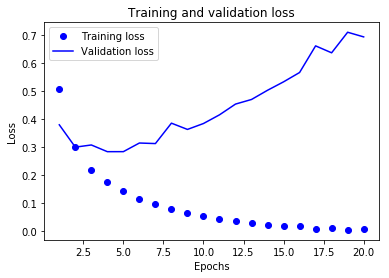

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(val_loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

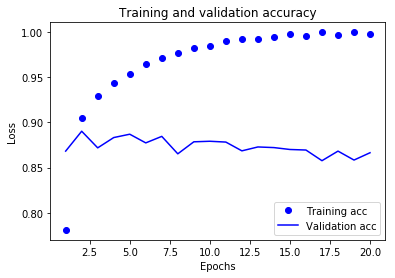

In [12]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Retraining a model from scratch and evaluate it

Now, retrain your model from scratch considering all the traning data (without validation). 

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(num_words,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [14]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 115us/step

In [15]:
print(model.metrics_names)
print(results)

['loss', 'acc']
[0.69413577140808103, 0.49459999999999998]


### Using a trained network to generate predictions on new data

In [16]:
#After having trained a network, you’ll want to use it in a practical setting. You can gen-
# gerate the likelihood of reviews being positive by using the predict method
model.predict(x_test[:1])

array([[ 0.50916129]], dtype=float32)

In [ ]:
y_test[:1]

In [25]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[0]])

In [26]:
decoded_review

"? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss"